# Friction velocity comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [8]:
plotfiles = [{'file':'/gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03-at/post_processing/abl_statistics00000.nc', 'type':'netcdf', 'timevar':'time', 'ustarvar':'ustar', 'toffset':-20000,
             'lstyle':{'color':'b', 'label':'AMR-Wind'}},
             {'file':'/gpfs/drhouck/AWAKEN/JRSE_Precursor/newmesh/z0_0p03_newWD/post_processing/abl_statistics40000.nc', 'type':'netcdf', 'timevar':'time', 'ustarvar':'ustar', 'toffset':-20000,
             'lstyle':{'color':'b'}},
             {'file':'/pscratch/mlblayl/AWAKEN/Neutral_Precursor_Yaw/abl_statistics.nc', 'type':'netcdf', 'timevar':'time', 'ustarvar':'utau','toffset':-20000,
              'lstyle':{'color':'g', 'linestyle':'--', 'label':'Nalu-Wind'}},
             {'file':'../WRFLES.5kmX5km_turbine1/post_processing/data/WRFLES_InflowProfiles_ustar_noturbine.dat', 'type':'text', 'timevar':0, 'ustarvar':1,'toffset':0,
              'lstyle':{'color':'orange', 'linestyle':'-.', 'label':'WRF-LES'}},
]

In [6]:
def plotustar(ax, plotlist):
    for p in plotlist:
        if p['type']=='netcdf':
            ds = Dataset(p['file'])
            time = np.array(ds[p['timevar']])
            ustar = np.array(ds[p['ustarvar']])
        elif p['type']=='text':
            ds = np.loadtxt(p['file'])
            time = ds[:,p['timevar']]
            ustar = ds[:,p['ustarvar']]
        toffset = p['toffset'] if 'toffset' in p else 0.0
        lstyle = p['lstyle']
        # mask some values
        time = time[ustar > 0.0] + toffset
        ustar = ustar[ustar > 0.0]
        ax.plot(time, ustar, **lstyle)

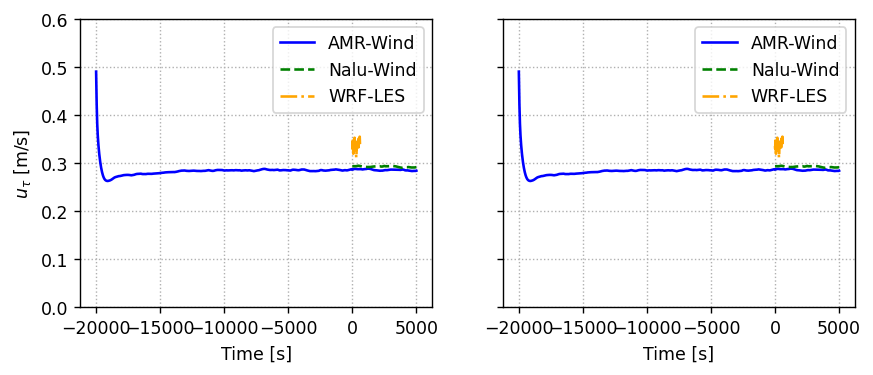

In [9]:
fig, axs = plt.subplots(1,2, figsize=(8,3), dpi=125, sharey=True)
plotustar(axs[0], plotfiles)
plotustar(axs[1], plotfiles)
#axs[1].set_xlim([20000, 20600])
axs[1].set_ylim([0, 0.6])
axs[0].set_ylabel(r'$u_{\tau}$ [m/s]')
for ax in axs:
    ax.set_xlabel('Time [s]')
    ax.legend()
    ax.grid(ls=':')

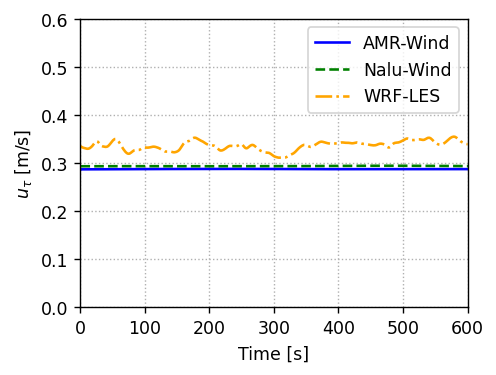

In [10]:
fig, axs = plt.subplots(1,1, figsize=(4,3), dpi=125, sharey=True)
plotustar(axs, plotfiles)
axs.set_xlim([0, 600])
axs.set_ylim([0, 0.6])
axs.set_ylabel(r'$u_{\tau}$ [m/s]')
axs.set_xlabel('Time [s]')
axs.legend()
axs.grid(ls=':')